#### Introduction

The project presents an Exploratory Data Analysis (EDA) of a comprehensive Uber ride-sharing dataset. As the ride-hailing industry continues to grow, understanding operational metrics, customer behavior, and pricing efficiency is crucial for business optimization and strategic decision-making.
The primary objective of this analysis is to transform raw transactional data into actionable insights by focusing on three core areas:

1.Demand Dynamics: Analyzing ride patterns based on date, time, and location to identify peak hours and high-traffic zones.

2.Operational Efficiency: Evaluating service quality through key performance indicators such as Average Vehicle Turnaround Time (Avg VTAT) and Average Customer Turnaround Time (Avg CTAT).

3.Operational Efficiency: Evaluating service quality through key performance indicators such as Average Vehicle Turnaround Time (Avg VTAT) and Average Customer Turnaround Time (Avg CTAT).

Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Import dataset

In [3]:
df = pd.read_csv(r'd:\\DataScience\\PROJECT\\Project UBER\\uberdata.csv')

viewing first 5 rows

In [5]:
(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Booking Value,Ride Distance,Payment Method
0,23-03-2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN
1,29-11-2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,237.0,5.73,UPI
2,23-08-2024,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,627.0,13.58,Debit Card
3,21-10-2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,416.0,34.02,UPI
4,16-09-2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,737.0,48.21,UPI


Viewing last 5 rows

In [6]:
(df.tail())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Booking Value,Ride Distance,Payment Method
149995,11-11-2024,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,475.0,40.08,Uber Wallet
149996,24-11-2024,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,1093.0,21.31,UPI
149997,18-09-2024,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,852.0,15.93,Cash
149998,05-10-2024,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,333.0,45.54,UPI
149999,10-03-2024,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,NaN,806.0,21.19,Credit Card


DATA CLEANING

In [73]:
#checking for null values
df.isna().sum()

Date                                0
Time                                0
Booking ID                     150000
Booking Status                      0
Customer ID                         0
Vehicle Type                        0
Pickup Location                     0
Drop Location                       0
Avg VTAT                            0
Avg CTAT                            0
Cancelled Rides by Customer         0
Booking Value                       0
Ride Distance                       0
Payment Method                      0
Time of Day                         0
Season                              0
Fare_per_km                         0
dtype: int64

In [ ]:
# take mean of booking id

mean_bookingid=df['Booking ID'].mean()
df['Booking ID'].fillna(mean_bookingid,inplace=True)
print(df['Booking ID'])

In [39]:
#take the mean of avg vehicle turnaround time

mean_AvgVTAT=df['Avg VTAT'].mean()
df['Avg VTAT'].fillna(mean_AvgVTAT,inplace=True)
print(df['Avg VTAT'].head(15))

0      8.456352
1      4.900000
2     13.400000
3     13.100000
4      5.300000
5      5.100000
6      7.100000
7     12.100000
8      8.456352
9      6.100000
10     7.700000
11     8.456352
12     4.600000
13    12.200000
14    14.000000
Name: Avg VTAT, dtype: float64


In [40]:
#take the avg Customer Turnaround Time

mean_AvgCTAT=df['Avg CTAT'].mean()
df['Avg CTAT'].fillna(mean_AvgCTAT,inplace=True)
print(df['Avg CTAT'].head(15))

0     29.149636
1     14.000000
2     25.800000
3     28.500000
4     19.600000
5     18.100000
6     20.400000
7     16.500000
8     29.149636
9     26.000000
10    18.900000
11    29.149636
12    29.149636
13    28.200000
14    30.900000
Name: Avg CTAT, dtype: float64


In [41]:
#take the avg of Cancelled Rides by Customer


mean_CancelledRidesbyCustomer=df['Cancelled Rides by Customer'].mean()
df['Cancelled Rides by Customer'].fillna(mean_CancelledRidesbyCustomer,inplace=True)
print(df['Cancelled Rides by Customer'].head(15))

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
Name: Cancelled Rides by Customer, dtype: float64


In [42]:
#take the avg of booking value


mean_BookingValue=df['Booking Value'].mean()
df['Booking Value'].fillna(mean_BookingValue,inplace=True)
print(df['Booking Value'].head(15))

0     508.295912
1     237.000000
2     627.000000
3     416.000000
4     737.000000
5     316.000000
6     640.000000
7     136.000000
8     508.295912
9     135.000000
10    181.000000
11    508.295912
12    508.295912
13    394.000000
14    836.000000
Name: Booking Value, dtype: float64


In [43]:
#take the avg of Ride distance


mean_RideDistance =df['Ride Distance'].mean()
df['Ride Distance'].fillna(mean_RideDistance ,inplace=True)
print(df['Ride Distance'].head(15))

0     24.637012
1      5.730000
2     13.580000
3     34.020000
4     48.210000
5      4.850000
6     41.240000
7      6.560000
8     24.637012
9     10.360000
10    19.840000
11    24.637012
12    24.637012
13    21.440000
14    39.550000
Name: Ride Distance, dtype: float64


In [44]:
#take the avg of Payment method


mode_PaymentMethod =df['Payment Method'].mode()[0]
df['Payment Method'].fillna(mode_PaymentMethod ,inplace=True)
print(df['Payment Method'].head(15))

0            UPI
1            UPI
2     Debit Card
3            UPI
4            UPI
5            UPI
6            UPI
7            UPI
8            UPI
9           Cash
10          Cash
11           UPI
12           UPI
13           UPI
14           UPI
Name: Payment Method, dtype: object


In [45]:
#checking for duplicate rows


df.duplicated().sum()

0

In [46]:
# Basic information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         150000 non-null  object 
 1   Time                         150000 non-null  object 
 2   Booking ID                   150000 non-null  object 
 3   Booking Status               150000 non-null  object 
 4   Customer ID                  150000 non-null  object 
 5   Vehicle Type                 150000 non-null  object 
 6   Pickup Location              150000 non-null  object 
 7   Drop Location                150000 non-null  object 
 8   Avg VTAT                     150000 non-null  float64
 9   Avg CTAT                     150000 non-null  float64
 10  Cancelled Rides by Customer  150000 non-null  float64
 11  Booking Value                150000 non-null  float64
 12  Ride Distance                150000 non-null  float64
 13 

In [47]:
#describe the data

print(df.describe())

            Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  150000.000000  150000.000000                     150000.0   
mean        8.456352      29.149636                          1.0   
std         3.639092       7.341242                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.600000      25.000000                          1.0   
50%         8.456352      29.149636                          1.0   
75%        11.000000      32.900000                          1.0   
max        20.000000      45.000000                          1.0   

       Booking Value  Ride Distance  
count  150000.000000  150000.000000  
mean      508.295912      24.637012  
std       326.389291      11.546441  
min        50.000000       1.000000  
25%       319.750000      17.360000  
50%       508.295912      24.637012  
75%       521.000000      30.650000  
max      4277.000000      50.000000  


In [48]:
# Transform Booking Date column to datetime


df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         150000 non-null  datetime64[ns]
 1   Time                         150000 non-null  object        
 2   Booking ID                   150000 non-null  object        
 3   Booking Status               150000 non-null  object        
 4   Customer ID                  150000 non-null  object        
 5   Vehicle Type                 150000 non-null  object        
 6   Pickup Location              150000 non-null  object        
 7   Drop Location                150000 non-null  object        
 8   Avg VTAT                     150000 non-null  float64       
 9   Avg CTAT                     150000 non-null  float64       
 10  Cancelled Rides by Customer  150000 non-null  float64       
 11  Booking Value             

DATA UNDERSTANDING

In [49]:
#Use summary statistics to understand distributions.



print(df.describe())

            Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  150000.000000  150000.000000                     150000.0   
mean        8.456352      29.149636                          1.0   
std         3.639092       7.341242                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.600000      25.000000                          1.0   
50%         8.456352      29.149636                          1.0   
75%        11.000000      32.900000                          1.0   
max        20.000000      45.000000                          1.0   

       Booking Value  Ride Distance  
count  150000.000000  150000.000000  
mean      508.295912      24.637012  
std       326.389291      11.546441  
min        50.000000       1.000000  
25%       319.750000      17.360000  
50%       508.295912      24.637012  
75%       521.000000      30.650000  
max      4277.000000      50.000000  


In [50]:
#Q1:Total rows and columns


rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 150000
Number of columns: 14


In [51]:
df['Booking ID'] = pd.to_numeric(df['Booking ID'], errors='coerce')


In [52]:
#Q2:datatypes of each column

print(df.dtypes)


Date                           datetime64[ns]
Time                                   object
Booking ID                            float64
Booking Status                         object
Customer ID                            object
Vehicle Type                           object
Pickup Location                        object
Drop Location                          object
Avg VTAT                              float64
Avg CTAT                              float64
Cancelled Rides by Customer           float64
Booking Value                         float64
Ride Distance                         float64
Payment Method                         object
dtype: object


In [53]:
#Q3:avg trip amount

avg_fare = df['Booking Value'].mean()
print(f"Average Fare Amount: {avg_fare}")


Average Fare Amount: 508.295911764706


In [54]:
#Q4 max trip amount

max= df['Booking Value'].max()
print(f"MAX Amount: {max}")

MAX Amount: 4277.0


In [55]:
#Q5 min trip amount


min=df['Booking Value'].min()
print(f"MIN Amount:{min}")

MIN Amount:50.0


In [56]:
#Q6 Avg trips per day


df['Date'] = pd.to_datetime(df['Date'])

# Extract just the date part
df['Date'] = df['Date'].dt.date

# Count trips per day
trips_per_day = df.groupby('Date').size()

# Average trips per day
avg_trips_per_day = trips_per_day.mean()

print(f"Average trips per day: {avg_trips_per_day}")

Average trips per day: 410.958904109589


In [57]:
#Q7:No. of rides per hour



df['Date'] = pd.to_datetime(df['Date'])

# Extract hour
df['Time'] = df['Date'].dt.hour

# Count rides per hour
busiest_hour = df['Time'].value_counts().idxmax()
ride_counts = df['Time'].value_counts().sort_index()

print("Number of rides per hour:")
print(ride_counts)
print(f"\n The busiest hour is: {busiest_hour}:")

Number of rides per hour:
0    150000
Name: Time, dtype: int64

 The busiest hour is: 0:


Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer', 'Booking Value',
       'Ride Distance', 'Payment Method'],
      dtype='object')
Avg VTAT: 8.46 minutes


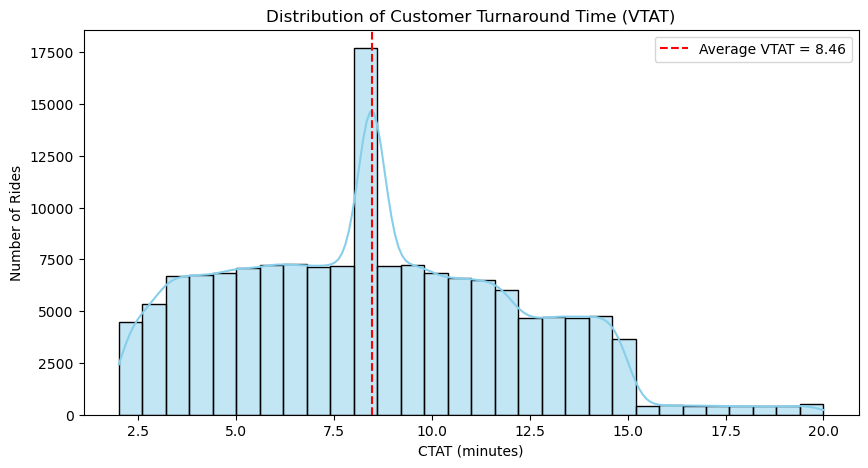

In [58]:
#Q8 avg VTAT

 
print(df.columns)  # run this once to confirm exact column name

# Assuming column is named 'VTAT'
avg_vtat = df['Avg VTAT'].mean()
print(f"Avg VTAT: {avg_vtat:.2f} minutes")

# --- Visualization ---
plt.figure(figsize=(10,5))

# Histogram with KDE
sns.histplot(df['Avg VTAT'].dropna(), kde=True, bins=30, color='skyblue')
plt.axvline(avg_vtat, color='red', linestyle='--', label=f'Average VTAT = {avg_vtat:.2f}')
plt.title("Distribution of Customer Turnaround Time (VTAT)")
plt.xlabel("CTAT (minutes)")
plt.ylabel("Number of Rides")
plt.legend()
plt.show()

Average TAT across all rides: 29.14963627450981


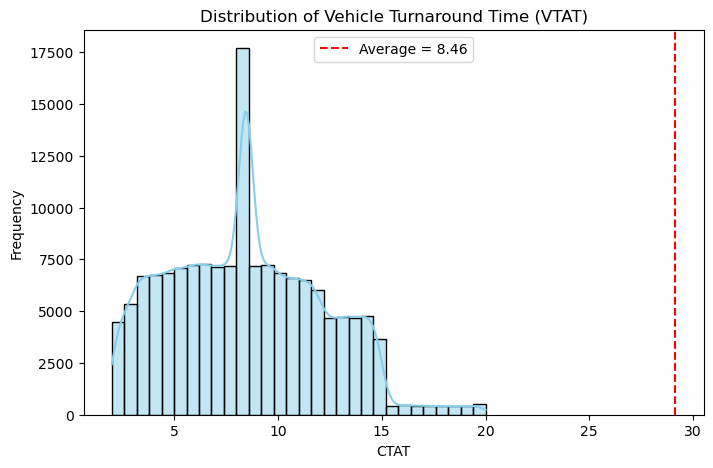

In [59]:
#Q9 avg CTAT


avg_ctat = df['Avg CTAT'].mean()
print("Average TAT across all rides:", avg_ctat)

# Plot distribution of VTAT
plt.figure(figsize=(8,5))
sns.histplot(df['Avg VTAT'], bins=30, kde=True, color='skyblue')
plt.axvline(avg_ctat, color='red', linestyle='--', label=f'Average = {avg_vtat:.2f}')
plt.title("Distribution of Vehicle Turnaround Time (VTAT)")
plt.xlabel("CTAT")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Payment Method
Credit Card    511.707807
UPI            508.399672
Cash           508.363188
Debit Card     507.405025
Uber Wallet    505.123656
Name: Booking Value, dtype: float64


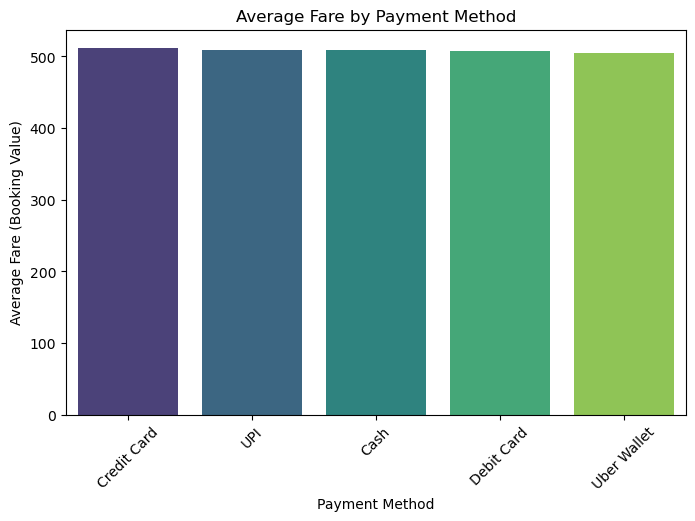

In [60]:
#Q10:  payment method has the highest average fare?
avg_fare_by_payment = df.groupby('Payment Method')['Booking Value'].mean().sort_values(ascending=False)
print(avg_fare_by_payment)

# Plot the results
plt.figure(figsize=(8,5))
sns.barplot(x=avg_fare_by_payment.index, y=avg_fare_by_payment.values, palette="viridis")
plt.title("Average Fare by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average Fare (Booking Value)")
plt.xticks(rotation=45)
plt.show()

Correlation between Ride Distance and Fare Amount: 0.005173977125101933


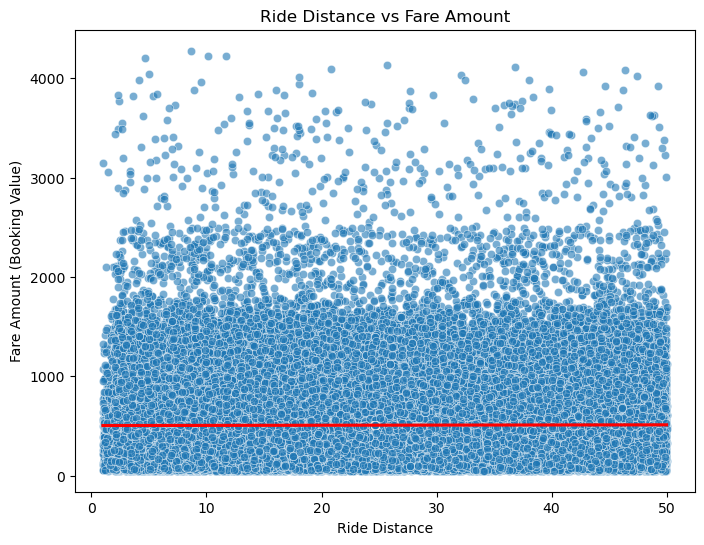

In [61]:
#Q11:correlation btwin ride distance and fare amount

correlation = df['Ride Distance'].corr(df['Booking Value'])
print("Correlation between Ride Distance and Fare Amount:", correlation)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df, alpha=0.6)
sns.regplot(x='Ride Distance', y='Booking Value', data=df, scatter=False, color='red')
plt.title("Ride Distance vs Fare Amount")
plt.xlabel("Ride Distance")
plt.ylabel("Fare Amount (Booking Value)")
plt.show()



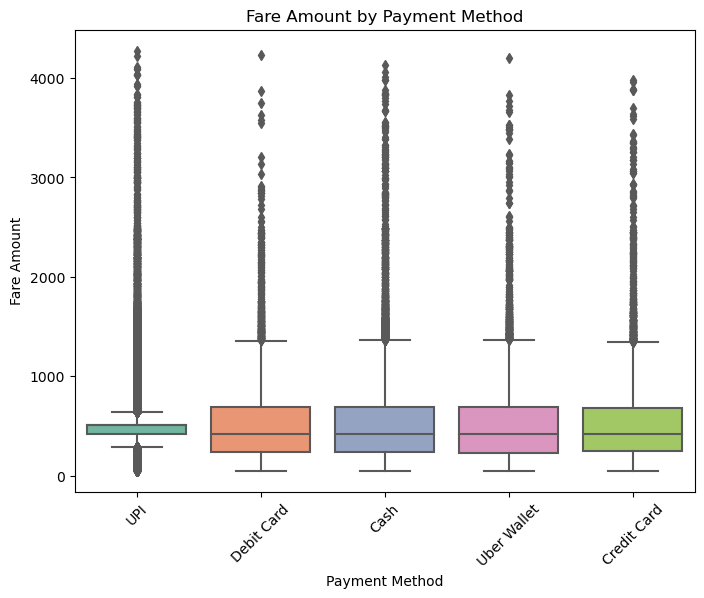

In [62]:
#Q12 Boxplot of Fare Amount by Payment Method

plt.figure(figsize=(8,6))
sns.boxplot(x='Payment Method', y='Booking Value', data=df, palette="Set2")
plt.title("Fare Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Fare Amount")
plt.xticks(rotation=45)
plt.show()



Payment Method   Cash  Credit Card  Debit Card    UPI  Uber Wallet
Time of Day                                                       
Night           25367        10209        8239  93909        12276


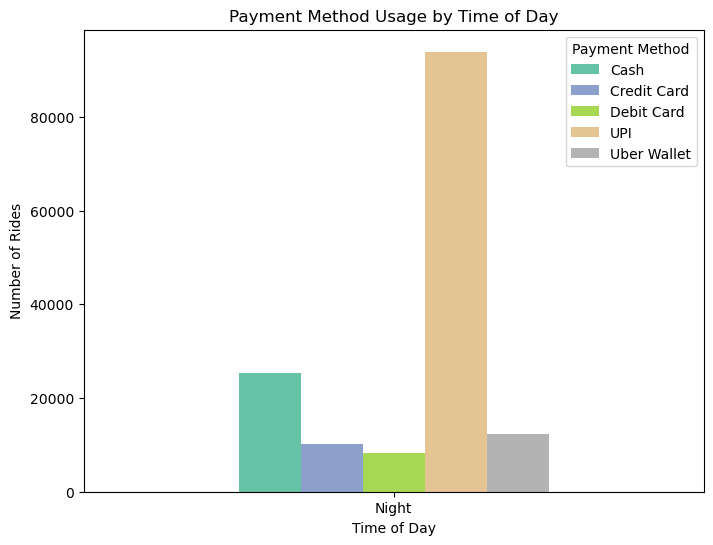

In [63]:
#Q13: Are cash payments more common at certain times of day compared to card payments?

# Convert to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Create Time of Day category
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time of Day'] = df['Time'].dt.hour.apply(get_time_of_day)

# Count payment method usage by time of day
payment_time = pd.crosstab(df['Time of Day'], df['Payment Method'])

print(payment_time)

# Plot
payment_time.plot(kind='bar', figsize=(8,6), colormap="Set2")
plt.title("Payment Method Usage by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.show()


Season
Winter    510.299529
Spring    507.204095
Summer    508.307169
Autumn    507.402754
Name: Booking Value, dtype: float64


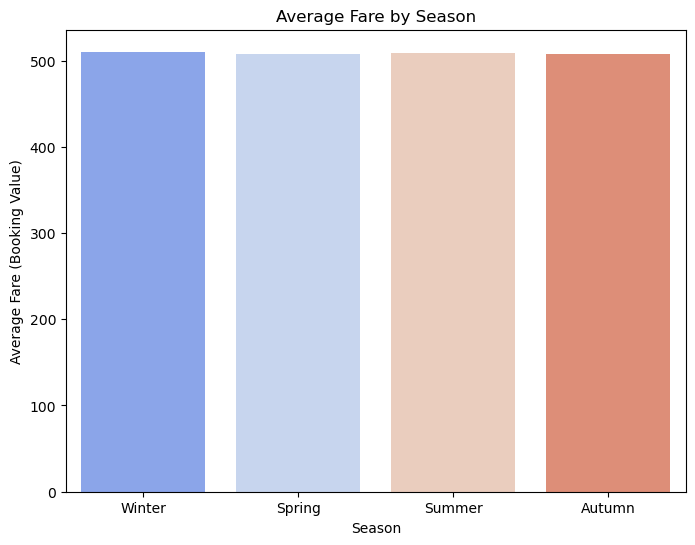

In [64]:
#Q14: How does average fare differ across different seasons? 

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Function to map month -> season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Create Season column
df['Season'] = df['Date'].dt.month.apply(get_season)

# Average fare by season
avg_fare_season = df.groupby('Season')['Booking Value'].mean().reindex(["Winter","Spring","Summer","Autumn"])
print(avg_fare_season)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=avg_fare_season.index, y=avg_fare_season.values, palette="coolwarm")
plt.title("Average Fare by Season")
plt.xlabel("Season")
plt.ylabel("Average Fare (Booking Value)")
plt.show()


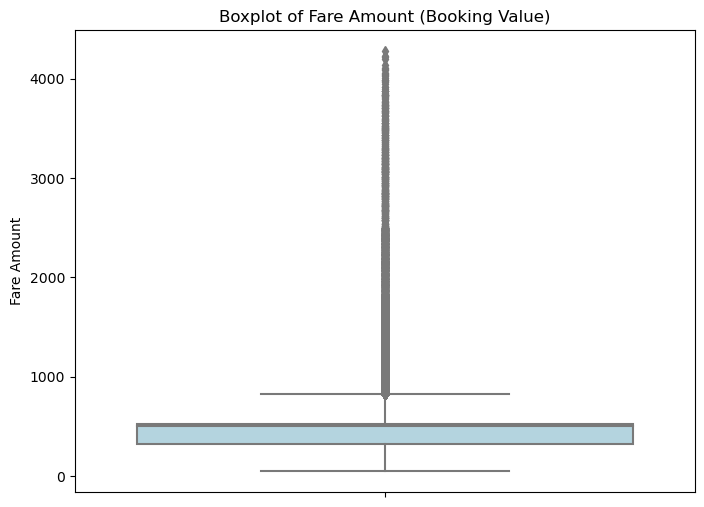

Number of outliers: 17332


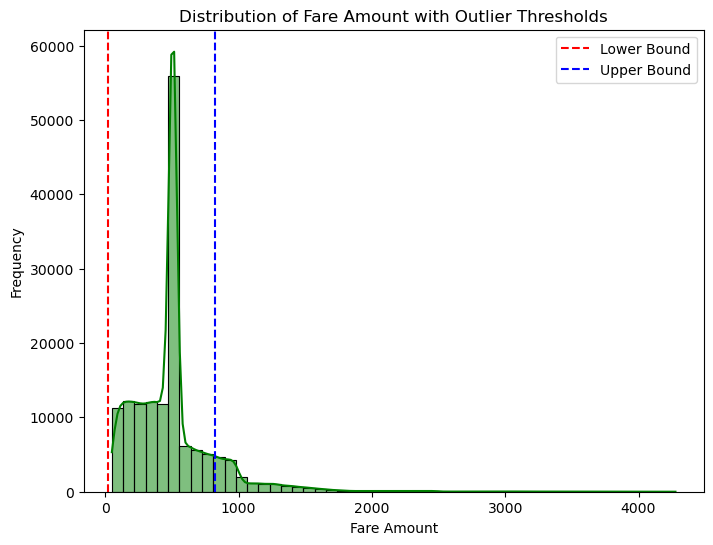

In [65]:
#Q14: Identify outliers in the fare amount column – do they indicate data entry errors or rare trips?


plt.figure(figsize=(8,6))
sns.boxplot(y=df['Booking Value'], color="lightblue")
plt.title("Boxplot of Fare Amount (Booking Value)")
plt.ylabel("Fare Amount")
plt.show()

Q1 = df['Booking Value'].quantile(0.25)
Q3 = df['Booking Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Booking Value'] < lower_bound) | (df['Booking Value'] > upper_bound)]
print("Number of outliers:", len(outliers))
outliers[['Booking Value', 'Pickup Location', 'Drop Location']].head(10)

plt.figure(figsize=(8,6))
sns.histplot(df['Booking Value'], bins=50, kde=True, color="green")
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
plt.title("Distribution of Fare Amount with Outlier Thresholds")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


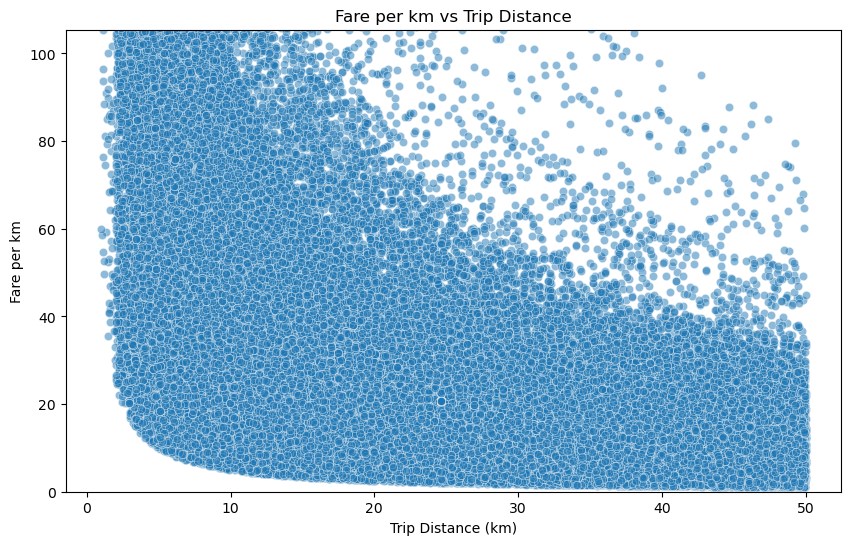

Average Fare per km (Short trips ≤ 5 km): 166.72
Average Fare per km (Long trips > 15 km): 19.06


In [66]:
#Q15: Do long-distance trips generate higher fares per km compared to short trips?


df['Fare_per_km'] = df['Booking Value'] / df['Ride Distance']

# Remove invalid values (zero or negative distances/fares)
df_valid = df[(df['Ride Distance'] > 0) & (df['Booking Value'] > 0)]

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_valid['Ride Distance'], y=df_valid['Fare_per_km'], alpha=0.5)
plt.title("Fare per km vs Trip Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare per km")
plt.ylim(0, df_valid['Fare_per_km'].quantile(0.95))  # limit y-axis for visibility
plt.show()

short_trips = df_valid[df_valid['Ride Distance'] <= 5]['Fare_per_km'].mean()
long_trips = df_valid[df_valid['Ride Distance'] > 15]['Fare_per_km'].mean()

print(f"Average Fare per km (Short trips ≤ 5 km): {short_trips:.2f}")
print(f"Average Fare per km (Long trips > 15 km): {long_trips:.2f}")


#### Conclusion

This analysis successfully extracted critical insights from the Uber dataset, providing a clear foundation for strategic planning and service improvement.

The analysis revealed distinct demand patterns, highlighting specific peak times and identifying the top pickup and drop locations, which can directly inform driver deployment and resource allocation strategies. Furthermore, the operational review provided baseline metrics for Avg VTAT and Avg CTAT, which are essential for monitoring and enhancing service reliability and speed.